In [2]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

In [3]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('kidney_disease.csv')
df.head(5)

Saving kidney_disease.csv to kidney_disease.csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [6]:
columns_to_retain = ['sg', 'al', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
df = df.dropna(axis=0)

In [ ]:
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

In [9]:
df.head(5)

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [10]:
X = df.drop(['classification'], axis=1)
Y = df['classification']

In [13]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, shuffle=True)

In [16]:
model = Sequential()
model.add(Dense(256, input_dim= len(X.columns), kernel_initializer = k.initializers.random_normal(seed=13), activation='relu'))
model.add(Dense(1, activation='hard_sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, Y_train, epochs = 2000, batch_size= X_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 13s 13s/step - loss: 0.6942 - accuracy: 0.6157
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6863 - accuracy: 0.7336
Epoch 3/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6787 - accuracy: 0.8253
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6711 - accuracy: 0.8472
Epoch 5/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6636 - accuracy: 0.8690
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6563 - accuracy: 0.8821
Epoch 7/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.6492 - accuracy: 0.8777
Epoch 8/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6422 - accuracy: 0.8777
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6352 - accuracy: 0.8821
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6284 - accuracy: 0.8821
Epoch 11/2000
1

In [20]:
model.save('ckd.model')

INFO:tensorflow:Assets written to: ckd.model/assets


Text(0.5, 0, 'epoch')

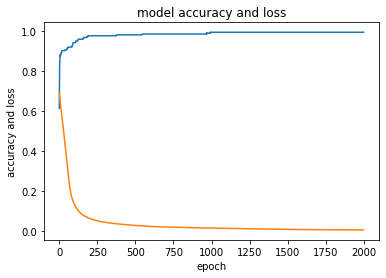

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [23]:
print('shape of training data:', X_train.shape)
print('shape of test data:', X_test.shape)

shape of training data: (229, 6)
shape of test data: (58, 6)


In [27]:
pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred]

print('Actual: {0}'.format(",".join(str(x) for x in Y_test)))
print('Predict: {0}'.format(",".join(str(x) for x in pred)))

Actual: 0,0,1,1,1,1,0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,1,0,1,0,1
Predict: 0,0,1,1,1,1,0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,1,0,1,0,1
